```
            self.composed = transforms.Compose([
                transforms.RandomResizedCrop(param.SZ),
                transforms.RandomHorizontalFlip(),
                transforms.RandomVerticalFlip(),
                transforms.ColorJitter(brightness=32. / 255.,saturation=0.5),
                transforms.ToTensor(),
                transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
```

# start

In [1]:
PRFX = 'MelEda0630A1'
PRFX_PREP = 'MelPrp0629A1'

# setup

In [2]:
from pathlib import Path
import pickle
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt

from torch.utils.data import Dataset, DataLoader

from torchvision import transforms
from PIL import Image
import cv2


In [3]:
p_cmp = '../input/siim-isic-melanoma-classification/'
p_prp = f'../output/{PRFX_PREP}'
dftrn = pd.read_csv(f'{p_prp}/train_all.csv') 
dftst = pd.read_csv(f'{p_prp}/test.csv')

../output/MelPrp0629A1/siim-isic-melanoma-classification/jpeg/train/ISIC_7237141.jpg


(490, 340)

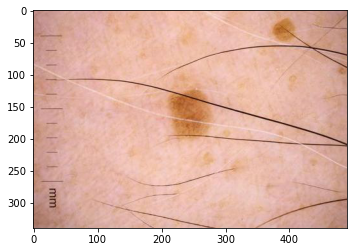

In [29]:
fnm = np.random.choice(dftrn.im_pth)
print(fnm)
x = Image.open(fnm)
plt.imshow(x);
x.size

## list

In [107]:
dir(transforms)

['CenterCrop',
 'ColorJitter',
 'Compose',
 'FiveCrop',
 'Grayscale',
 'Lambda',
 'LinearTransformation',
 'Normalize',
 'Pad',
 'RandomAffine',
 'RandomApply',
 'RandomChoice',
 'RandomCrop',
 'RandomErasing',
 'RandomGrayscale',
 'RandomHorizontalFlip',
 'RandomOrder',
 'RandomPerspective',
 'RandomResizedCrop',
 'RandomRotation',
 'RandomSizedCrop',
 'RandomVerticalFlip',
 'Resize',
 'Scale',
 'TenCrop',
 'ToPILImage',
 'ToTensor',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'functional',
 'transforms']

## resize 

(512, 512)

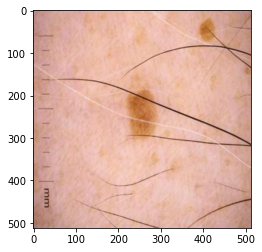

In [94]:
y = transforms.Resize((512, 512))(x)
plt.imshow(y)
y.size

## RandomResizedCrop

(512, 512)

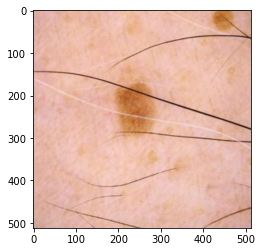

In [98]:
y = transforms.RandomResizedCrop(512)(x)
plt.imshow(y)
y.size

(512, 512)

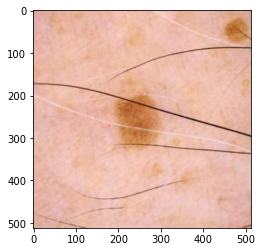

In [179]:
y = transforms.RandomResizedCrop(512, scale=(0.5, 1.0))(x)
plt.imshow(y)
y.size

## RandomRotation

(490, 340)

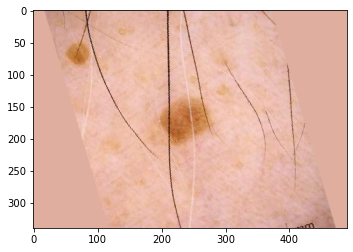

In [167]:
y = transforms.RandomRotation(180,
                              fill=tuple(np.array(x).mean((0,1)).astype(int)))(x)
plt.imshow(y)
y.size

(490, 340)

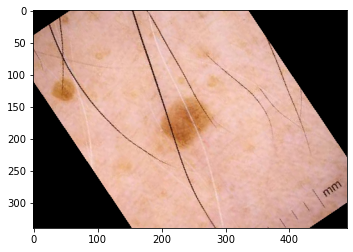

In [102]:
y = transforms.RandomRotation(180)(x)
plt.imshow(y)
y.size

(512, 512)

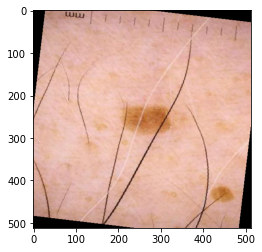

In [202]:
y = transforms.Resize((512, 512))(x)
y = transforms.RandomRotation(180)(y)
plt.imshow(y)
y.size

(512, 512)

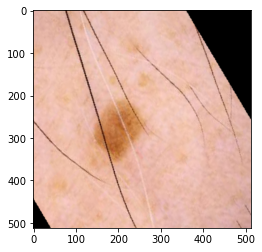

In [203]:
y = transforms.RandomRotation(180)(x)
y = transforms.RandomResizedCrop(512, scale=(0.5, 1.0))(y)
plt.imshow(y)
y.size

(512, 512)

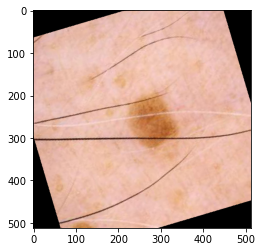

In [207]:
y = transforms.RandomResizedCrop(512, scale=(0.5, 1.0))(x)
y = transforms.RandomRotation(180)(y)
plt.imshow(y)
y.size

## RandomAffine

(490, 340)

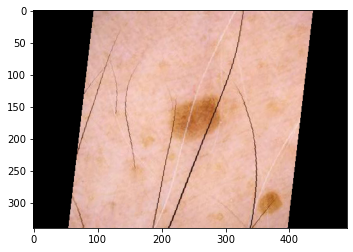

In [141]:
# torchvision.transforms.RandomAffine(degrees, translate=None, scale=None, shear=None, resample=False, fillcolor=0)
y = transforms.RandomAffine(180, shear=40)(x)
plt.imshow(y)
y.size

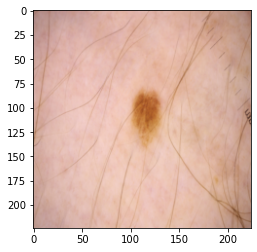

In [73]:
z = transforms.RandomHorizontalFlip()(y)
plt.imshow(z);